In [1]:
import pandas as pd

In [21]:
dataframe = pd.read_csv("data/train.csv")

In [23]:
dataframe["Age"] = dataframe["Age"] / 365

In [24]:
dataframe.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,50.337388,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,10.082079,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,26.295890,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,42.668493,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,51.268493,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,56.668493,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,78.493151,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [49]:
for col in dataframe.select_dtypes(include=['object']):
    print(f"{col} categories: {set(list(dataframe[col]))}")

Drug categories: {'Placebo', 'D-penicillamine'}
Sex categories: {'F', 'M'}
Ascites categories: {'N', 'Y'}
Hepatomegaly categories: {'N', 'Y'}
Spiders categories: {'N', 'Y'}
Edema categories: {'N', 'Y', 'S'}
Status categories: {'C', 'CL', 'D'}


In [31]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   float64
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

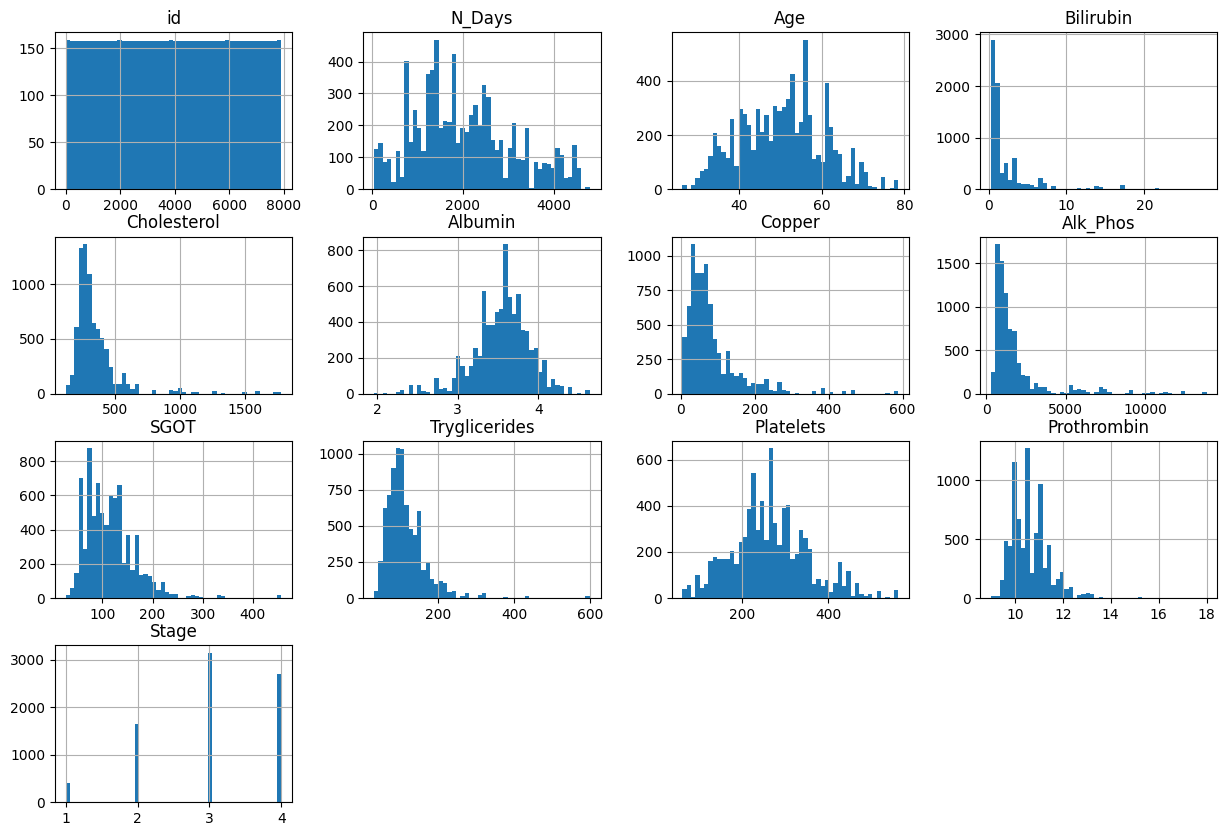

In [59]:
dataframe.hist(bins=50, figsize=(15, 10))
plt.show()

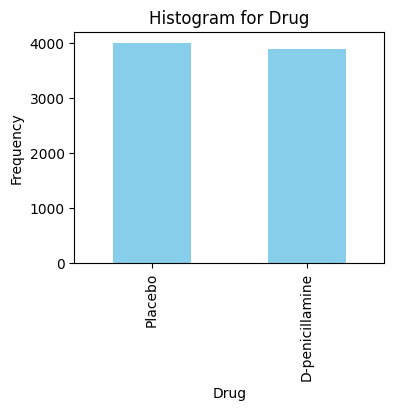

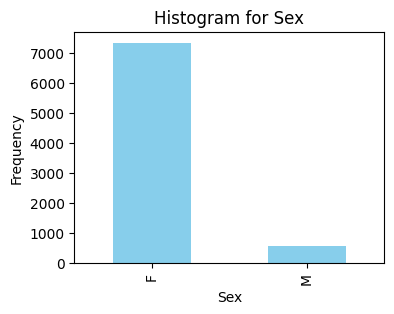

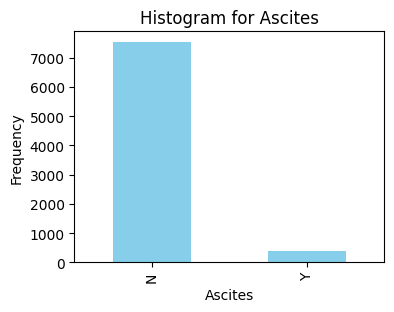

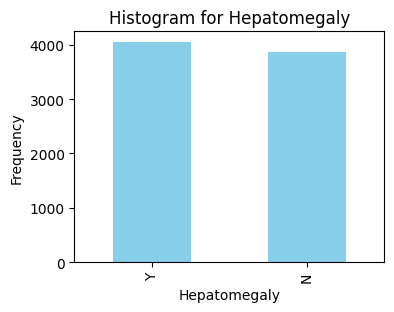

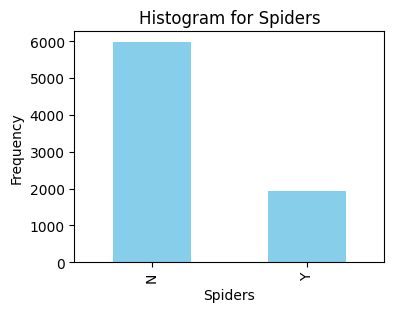

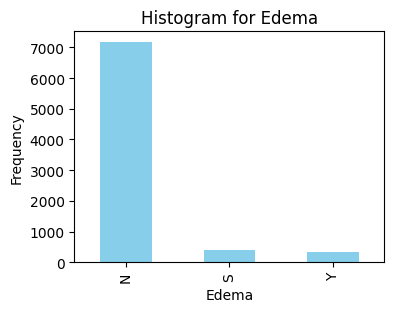

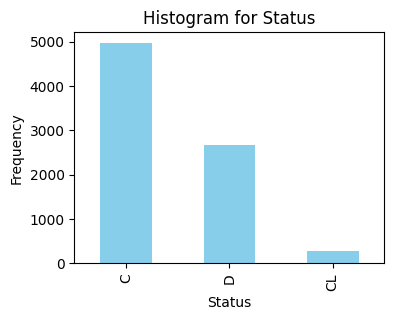

In [58]:
categorical_columns = dataframe.select_dtypes(include=['object'])

# Plot histograms for each categorical column
for column in categorical_columns.columns:
    plt.figure(figsize=(4, 3))
    dataframe[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()